一.数据预处理

In [164]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import seaborn as sns
sns.set()

添加一个支持中文字符的字体

In [165]:
font = FontProperties(fname=r"c:\windows\fonts\simsun.ttc")
plt.rcParams['font.sans-serif'] = [font.get_name()]  # 设置默认字体
plt.rcParams['axes.unicode_minus'] = False

In [166]:
names=['CRIM','ZN','INDUS','CHAS','NOX','RM','GE','DIS','RAD','TAX','PRTATIO','B','LSTAT','PRICE']
boston=pd.read_csv("C:\\Users\\潘敏菊\\Desktop\\housing-Sheet1.csv",names=names,delim_whitespace=True)
boston.head(10)#读取前十行

,CRIM,ZN,INDUS,CHAS,NOX,RM,GE,DIS,RAD,TAX,PRTATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9


In [167]:
#查看各字段基础信息
boston.info()
#查看缺失值
boston.isnull().sum()
#描述性数据统计
boston.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   GE       506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PRTATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


,CRIM,ZN,INDUS,CHAS,NOX,RM,GE,DIS,RAD,TAX,PRTATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


             CRIM        ZN     INDUS      CHAS       NOX        RM        GE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
GE       0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PRTATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.385064  0.175520 

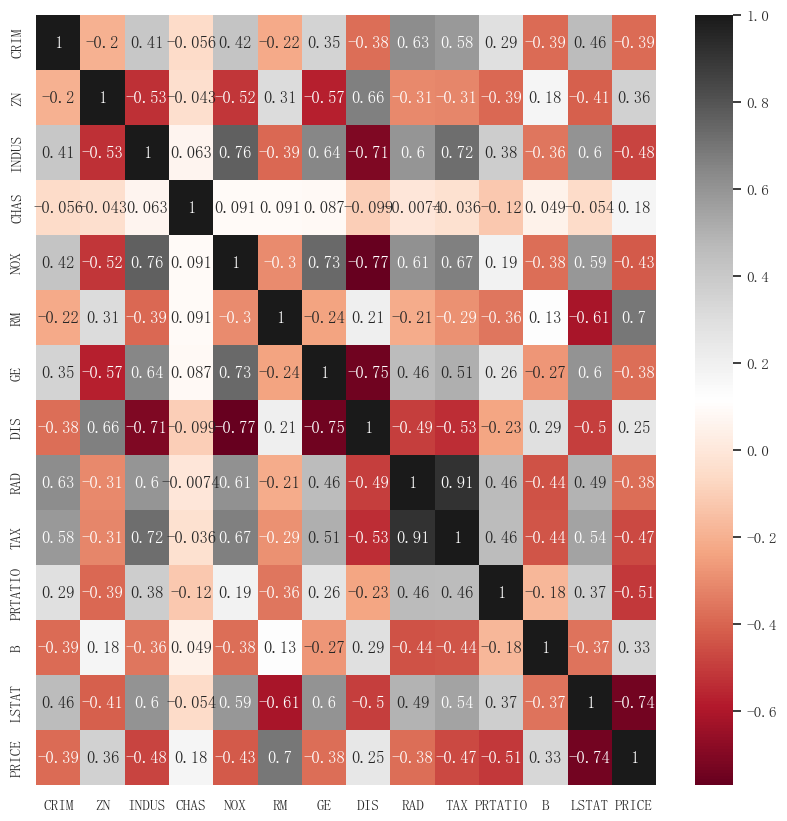

In [168]:
#查看各字段的相关性
corrboston=boston.corr()
print(corrboston)

plt.figure(figsize=(10,10))
sns.heatmap(corrboston,annot=True,cmap='RdGy')
plt.show()

In [169]:
#查看数据集大小
boston.shape

(506, 14)

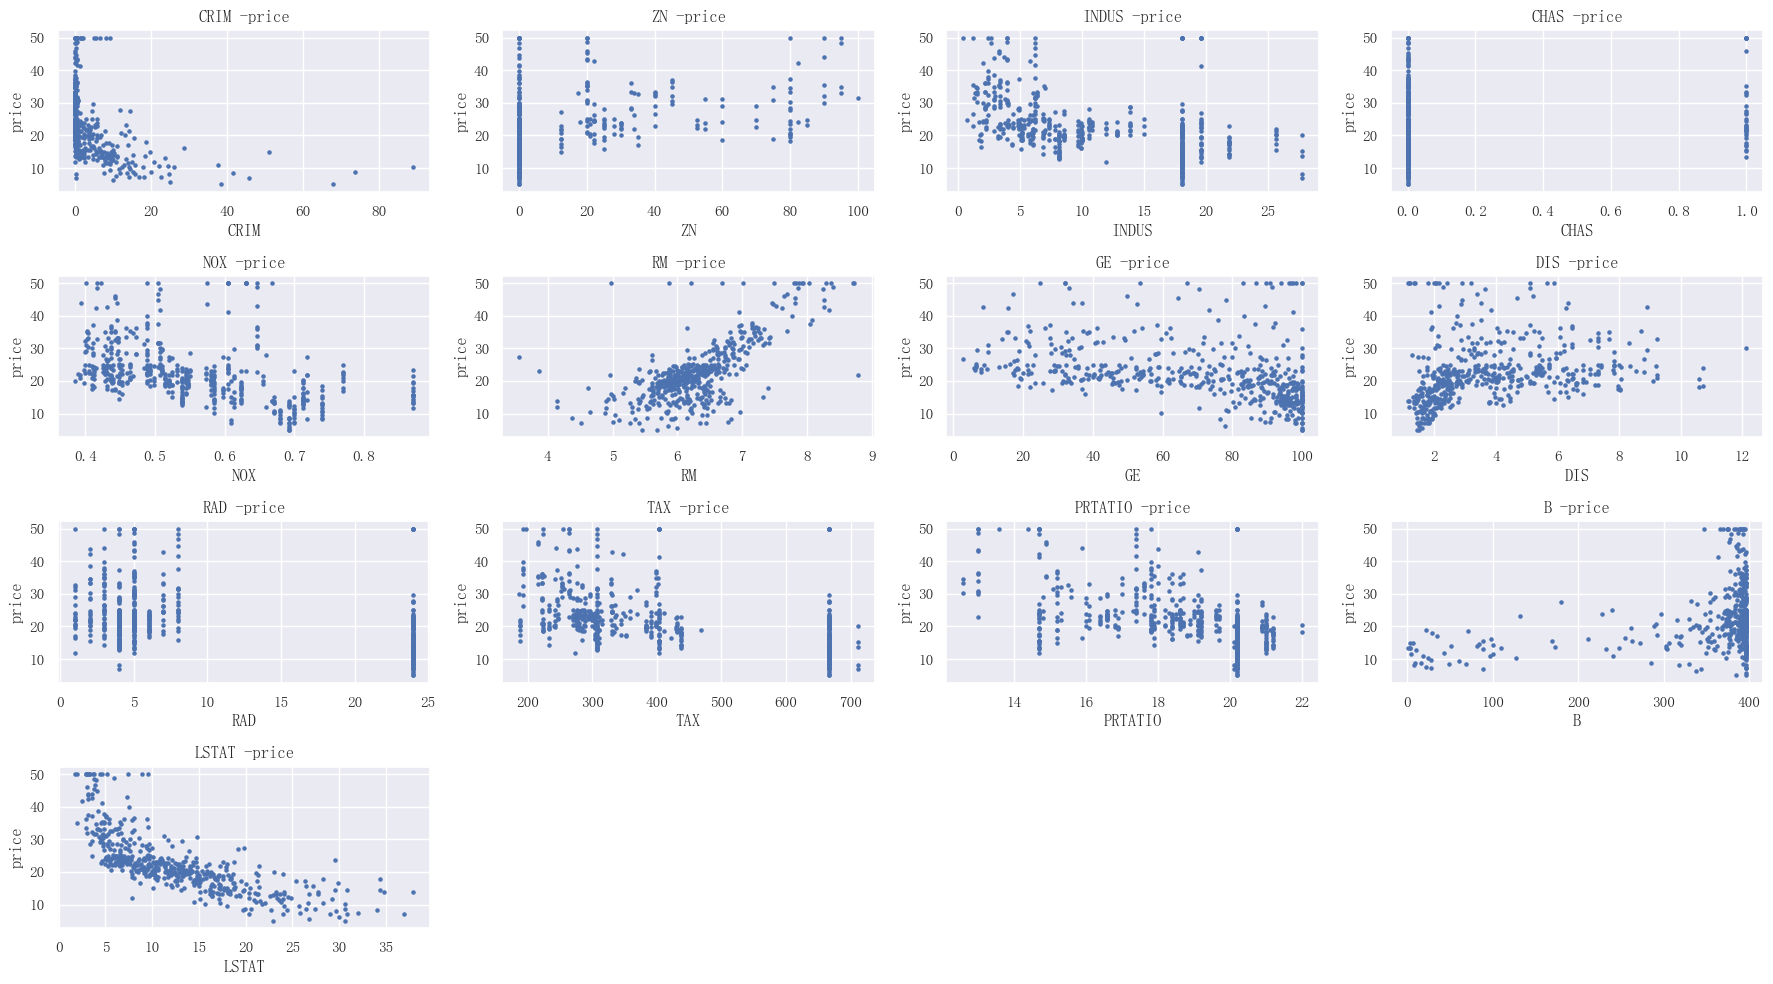

In [170]:
# 绘制特征值与价格的散点图  
plt.figure(figsize=(18, 10))  
  
for i in range(13):  
    plt.subplot(4, 4, i + 1)  
    plt.scatter(boston[names[i]], boston['PRICE'],s=5) 
    plt.xlabel(names[i])    
    plt.ylabel('price')  
    plt.title(f'{names[i]} -price') 
   
  
plt.tight_layout()  # 调整子图布局  
plt.show()


In [171]:
#划分训练集和测试集
# 分离特征和目标变量  
X = boston.drop('PRICE', axis=1)  # 假设'MEDV'是目标列  
y = boston['PRICE']  
print(type(X))  
print(type(y))  

 
# 设置测试集的比例  
test_size = 0.2  
  
# 计算测试集的大小  
test_set_size = int(test_size * len(X))  
  
# 随机打乱索引  
np.random.seed(42)  # 设置随机种子以确保结果的可重复性  
indices = np.random.permutation(len(X))  
  
# 使用打乱后的索引来划分数据集  
X_train = X.iloc[indices[:-test_set_size]]  
y_train = y.iloc[indices[:-test_set_size]]  
X_test = X.iloc[indices[-test_set_size:]]  
y_test = y.iloc[indices[-test_set_size:]]  
  
# 现在X_train和y_train是训练集的特征和目标变量  
# X_test和y_test是测试集的特征和目标变量  
  
print(type(X_train))  
print(type(y_train))  
print(type(X_test))  
print(type(y_test))
# 打印数据集的形状以确认划分  
print("X_train shape:", X_train.shape)  
print("y_train shape:", y_train.shape)  
print("X_test shape:", X_test.shape)  
print("y_test shape:", y_test.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
X_train shape: (405, 13)
y_train shape: (405,)
X_test shape: (101, 13)
y_test shape: (101,)


In [172]:

#在特征值（包括训练集和测试集的最左边添加截距项）
#为特征矩阵在左边添加偏置项（全为1的1列）
X_train = np.hstack([np.ones((X_train.shape[0],1),dtype = float), X_train])
X_test = np.hstack([np.ones((X_test.shape[0],1),dtype = float), X_test])
print(type(X_train))  
print(type(y_train))  
print(type(X_test))  
print(type(y_test))

<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>


二，建立回归模型

最小二乘法

In [173]:
#使用正规方程计算权重#计算权重的解析解,权重就是一竖条，有13+1=14个值
weight = np.linalg.pinv(X_train.T.dot(X_train)).dot(X_train.T.dot(y_train))

#使用权重计算房价的预测值
y_pre = X_test.dot(weight)#点乘时必须把权重放在右边，（点乘没有交换律）
print(y_pre)
print(y_pre.shape)
print("1")
print(y_test)
print(y_test.shape)
#计算均方误差
error = ((y_test-y_pre)**2).mean()
print('均方误差为：%f'%(error))


[27.87272445 19.58255713 24.83070474 20.54029357 19.95602927 32.58065033
 20.60815363 25.80493628 29.56546149 36.55901724 24.33109383 28.50899103
 17.72578922 30.47598106 23.96731157 35.85813209 19.04042182 23.99542349
 14.26308912 25.37936566 17.63242802 10.89495087 17.37108039 14.3453119
 28.53501371 22.48575217 14.24198154 18.08926183 35.05446925 14.26084903
 15.81306463 27.95524459 21.65841816 21.79667469 27.56741074 16.39591375
 36.52343406 24.02566961 19.89950872 20.89472806 31.25672978  5.47527513
 35.25281909 36.90543026 20.84833775 21.44412824 13.23853286 36.38323092
 19.33463659 21.37965974 27.19902716 15.4442228  19.92293389 21.35801363
 20.00706603 27.06154297 11.93731471 34.44880446 22.83018946 22.34645446
 33.48149086 26.49594271 21.91631165  9.31264461 28.57482842 25.59979533
 24.4851982  18.19928751 25.96330665 18.36835779 32.34598393 35.47957896
 17.96642394 30.14128753  7.953009   25.19446821 12.09989662 28.02683828
 43.71373686 29.05507739 14.74055146 19.9146682  18.

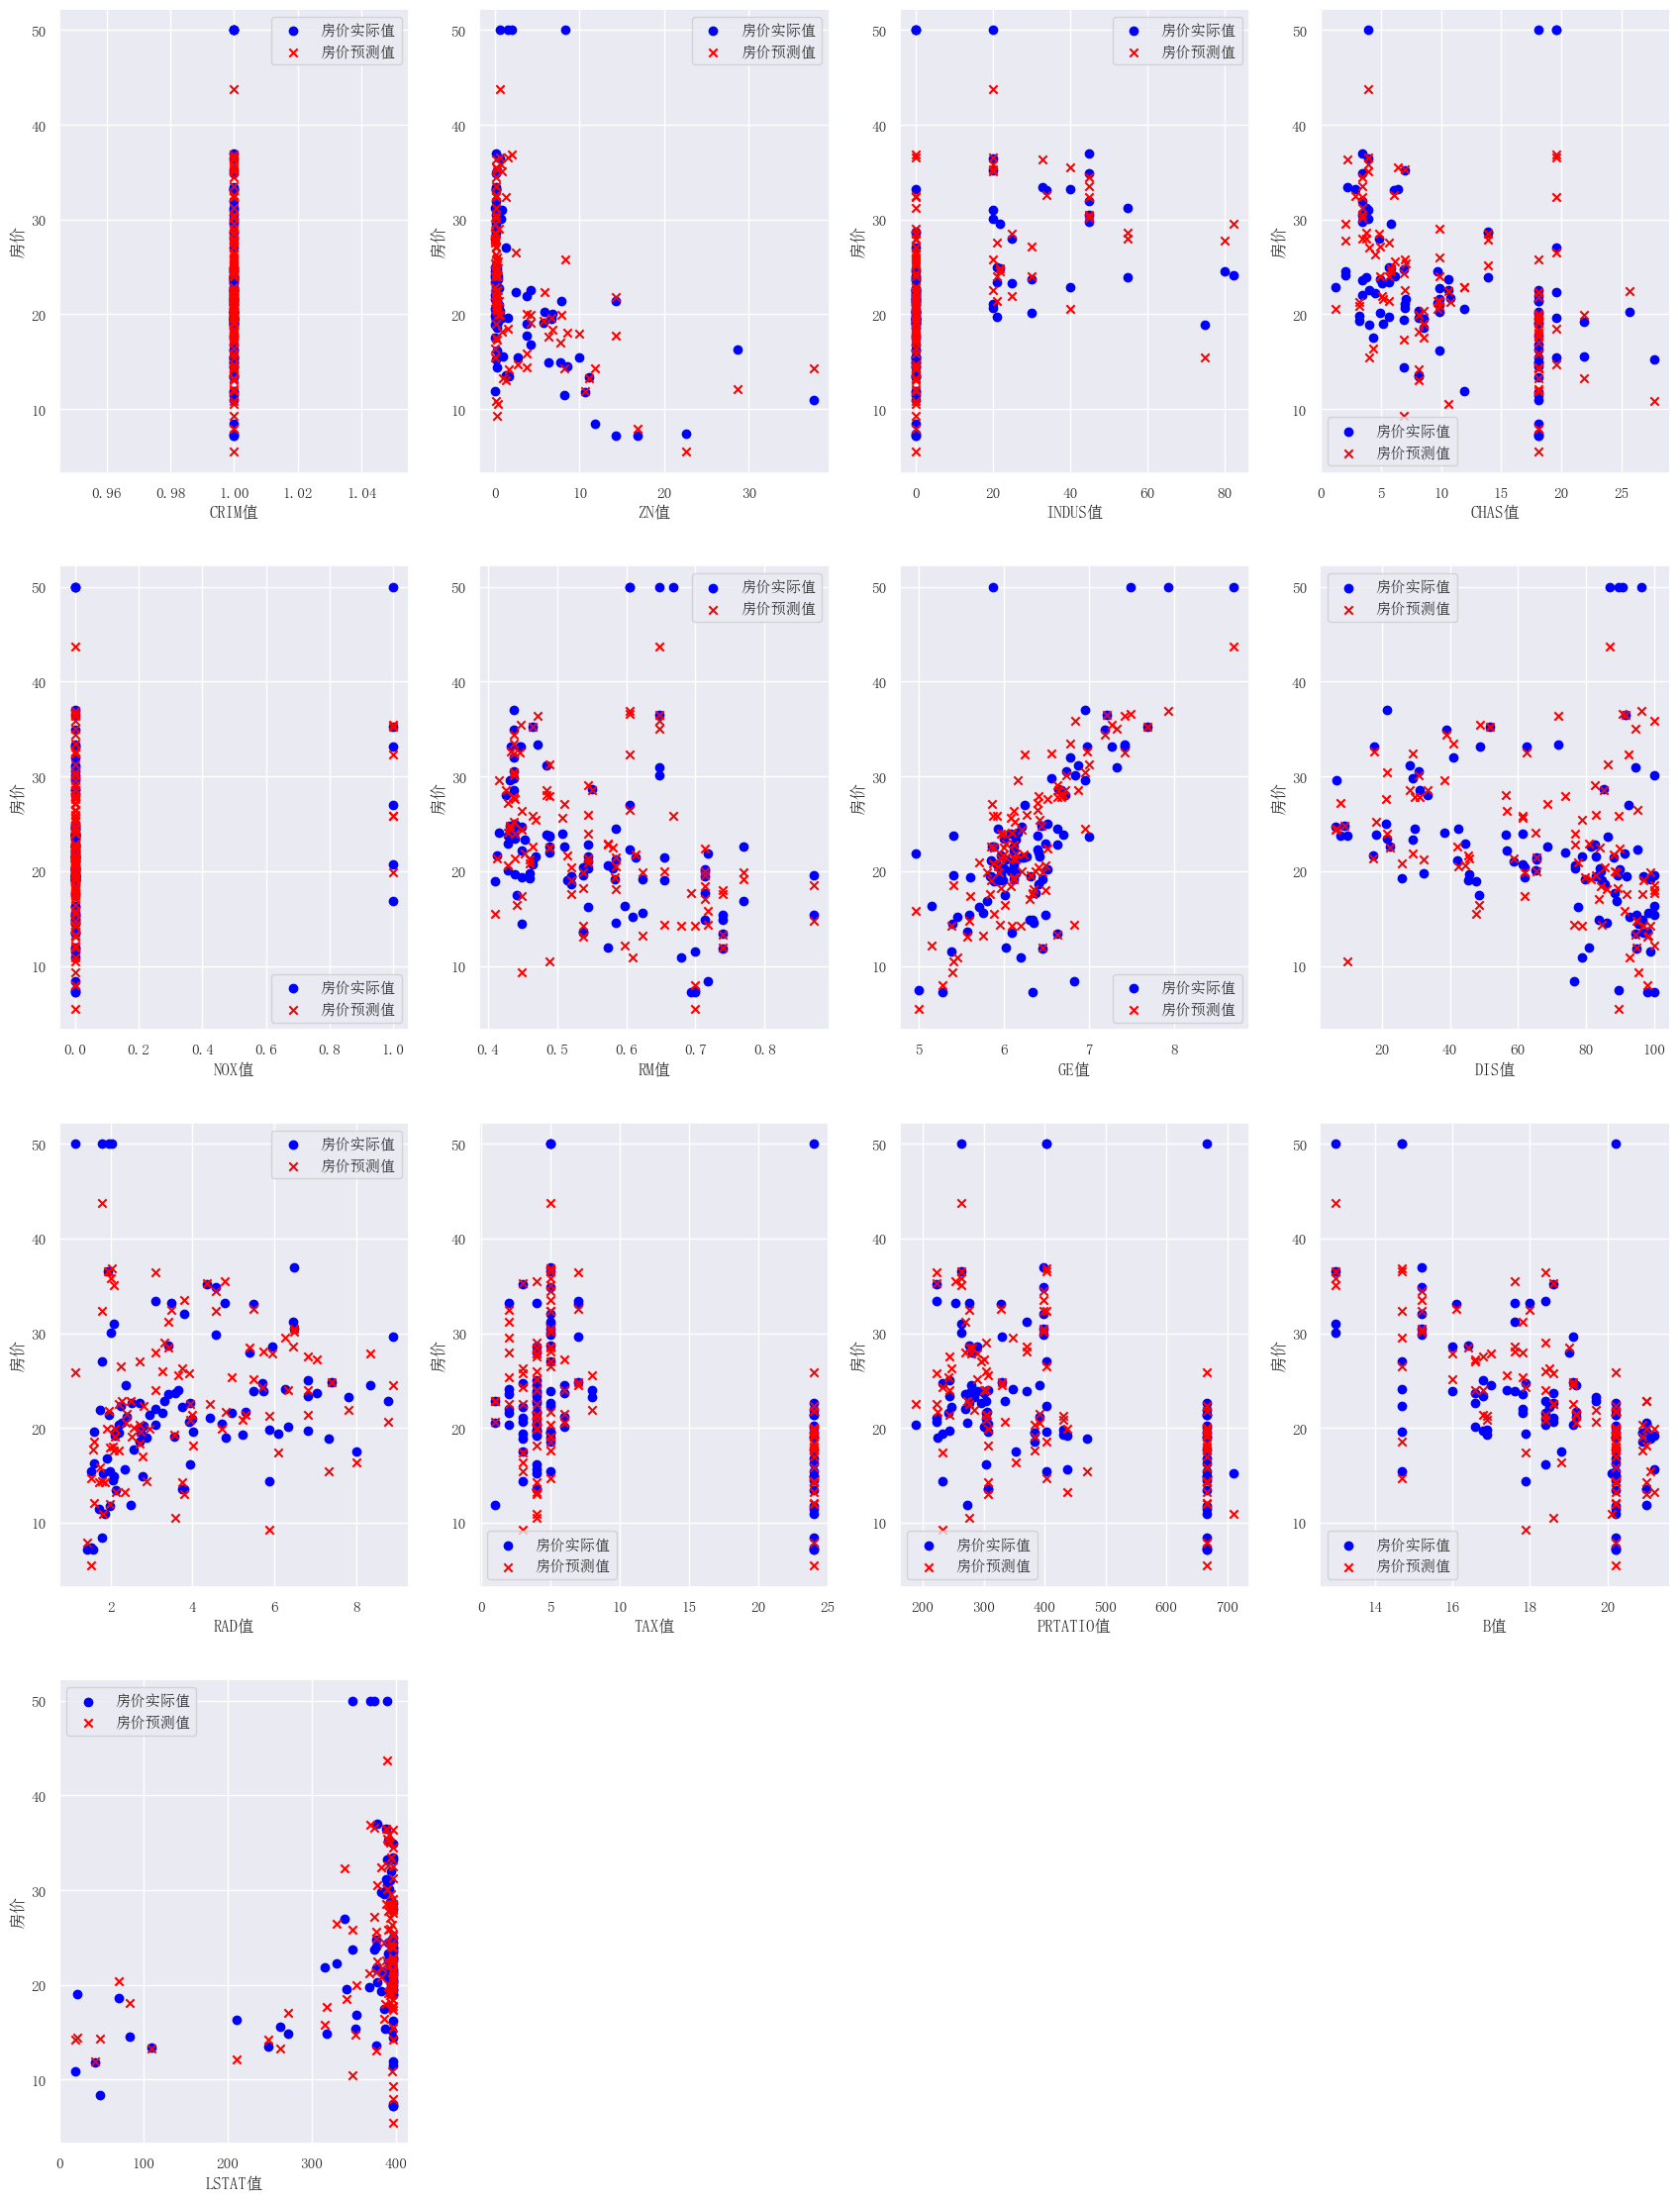

In [174]:
# 设置画布大小，以适应多个图
plt.figure(figsize=(21, 28))
#画13个散点图，查看预测值与实际值
for i in range(13):
    # 使用 subplots() 函数创建一个子图，sharex=True 和 sharey=True 使得所有子图共享x轴和y轴刻度
    if i < 12:
        plt.subplot(4, 4, i + 1)  # 4x4网格中的第i+1个子图
    else:
        plt.subplot(4, 4, 13)  # 最后一行只有一个子图

    # 绘制散点图
    plt.scatter(X_test[:, i], y_test, color='blue', label='房价实际值')  # 使用scatter代替plot来创建散点图
    plt.scatter(X_test[:, i], y_pre, color='red', marker='x', label='房价预测值')  # 使用不同的标记来区分预测值

    plt.legend()
    plt.xlabel('%s值'%(names[i]))
    plt.ylabel('房价')

plt.show()